<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

df['veteran'] = np.where(df['time_spend_company'] >= 5, 1, 0).astype(int)
df.veteran = df.veteran.astype('category')
df['department'] = df['department'].astype('category')
df['salary'] = df['salary'].astype('category')

In [ ]:
y = df['veteran'] # выбираем целевую переменную (категориальную)
X = df.drop('veteran', axis=1) # переменные для проверки влияния

X = X.drop('time_spend_company', axis=1)
df.drop('time_spend_company', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   Work_accident          14999 non-null  int64   
 5   promotion_last_5years  14999 non-null  int64   
 6   department             14999 non-null  category
 7   salary                 14999 non-null  category
 8   left                   14999 non-null  int64   
 9   veteran                14999 non-null  category
dtypes: category(3), float64(2), int64(5)
memory usage: 864.9 KB


In [ ]:
# Создаем копию данных
X_processed = X.copy()
category_columns: list[str] = X.select_dtypes(include=['category']).columns

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [ ]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   Work_accident          14999 non-null  int64   
 5   promotion_last_5years  14999 non-null  int64   
 6   department             14999 non-null  category
 7   salary                 14999 non-null  category
 8   left                   14999 non-null  int64   
dtypes: category(2), float64(2), int64(5)
memory usage: 850.2 KB


In [ ]:
y.value_counts()

veteran
0    12244
1     2755
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

# Объединяем X и y для удобства
data = pd.concat([X, y], axis=1)

# Разделяем на классы
majority = data[data['veteran'] == 0]
minority = data[data['veteran'] == 1]

# Уменьшаем количество экземпляров класса 1
minority_downsampled = resample(minority,
                                replace=False,
                                n_samples=int(len(majority)*0.1),
                                random_state=11)

# Объединяем обратно
data_disbalanced = pd.concat([majority, minority_downsampled])

# Новые X и y
X_disbalanced = data_disbalanced.drop('veteran', axis=1)
y_disbalanced = data_disbalanced['veteran']
print(y_disbalanced.value_counts())

veteran
0    12244
1     1224
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_disbalanced, y_disbalanced, test_size=0.3, random_state=11)

# Обучаем модель
model = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9064587973273942

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3664
           1       0.00      0.00      0.00       377

    accuracy                           0.91      4041
   macro avg       0.45      0.50      0.48      4041
weighted avg       0.82      0.91      0.86      4041



In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts)) # Модель очень хорошо обучилась на 0, настолько, что не может предсказать 1

{0: 4040, 1: 1}

In [ ]:
# Уменьшаем количество экземпляров класса 0
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=15)

# Объединяем обратно
data_balanced = pd.concat([majority_downsampled, minority])

# Новые X и y
X_balanced = data_balanced.drop('veteran', axis=1)
y_balanced = data_balanced['veteran']

In [ ]:
print(y_balanced.value_counts())

veteran
0    2755
1    2755
Name: count, dtype: int64


In [ ]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=15)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy: 0.6715063520871143

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69       802
           1       0.72      0.59      0.65       851

    accuracy                           0.67      1653
   macro avg       0.68      0.67      0.67      1653
weighted avg       0.68      0.67      0.67      1653



In [ ]:
unique, counts = np.unique(y_pred_bal, return_counts=True)

dict(zip(unique, counts))

{0: 953, 1: 700}

In [ ]:
# Выбираем числовые признаки
numeric_features = X_balanced.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_balanced[numeric_features] = scaler.fit_transform(X_balanced[numeric_features])

In [ ]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=15)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal)) # + 1,5%

Accuracy: 0.6860254083484574

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70       533
           1       0.74      0.61      0.67       569

    accuracy                           0.69      1102
   macro avg       0.69      0.69      0.68      1102
weighted avg       0.69      0.69      0.68      1102



In [ ]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=15)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Вычисляем матрицу ошибок (TP, FP, TN, FN)
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
tn, fp, fn, tp = conf_matrix.ravel()

# Рассчитываем метрики
accuracy = accuracy_score(y_test_bal, y_pred_bal)
precision = precision_score(y_test_bal, y_pred_bal)
recall = recall_score(y_test_bal, y_pred_bal)
f1 = f1_score(y_test_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_bal, y_pred_bal)

# Генерируем classification_report
class_report = classification_report(y_test_bal, y_pred_bal, output_dict=True)

# Формируем результаты для наглядного вывода
results = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}

# Округляем все значения в словаре до двух знаков после запятой и возвращаем в виде dict.items()
rounded_items = {k: round(v, 2) for k, v in results.items()}

In [ ]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       533
           1       0.74      0.61      0.67       569

    accuracy                           0.69      1102
   macro avg       0.69      0.69      0.68      1102
weighted avg       0.69      0.69      0.68      1102



In [ ]:
rounded_items

{'True Negatives (TN)': 410,
 'False Positives (FP)': 123,
 'False Negatives (FN)': 223,
 'True Positives (TP)': 346,
 'Accuracy': 0.69,
 'Precision': 0.74,
 'Recall': 0.61,
 'F1-score': 0.67,
 'ROC-AUC': 0.69}

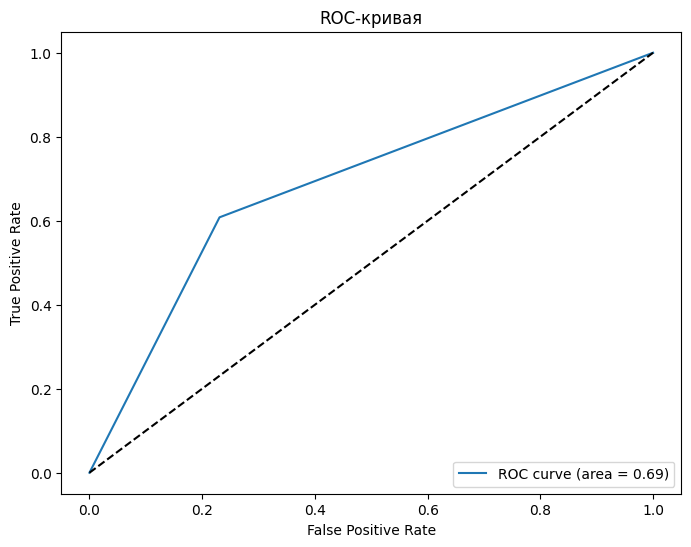

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_bal)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

⏰ **Общая точность** модели составила 0.69, значит, модель 69% наблюдений классифицировала верно. Результат неплохой. 346 раз модель правильно предположила, что работник является "ветераном" в компании и 410 раз определила верно, кто точно не ветеран. Ошибочно отнесла к ветеранам 123 рабочих и пропустила 223 человека. **Tочность классификации** составила 0.74, значит, модель 74% рабочих, которые являлись ветеранами, классифицировала как ветеранов. **Полнота классификации** равна 0.61, то есть модель нашла и отнесла к классу 61% от всех ветеранов. **Гармоническое среднее** между полнотой и точностью классификации - 0.67, это говорит о том, что метрики, в целом, сбалансированы. **ROC-AUC** равно 0.69, модель классифицирует лучше случайного угадывания, но имеет возможности для улучшения.

In [ ]:
y = df['time_spend_company']

X = df.drop(['time_spend_company', 'veteran'], axis=1)

In [ ]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [ ]:
X

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  Work_accident  promotion_last_5years  left  \
0                       157              0                      0     1   
1                       262              0                      0     1   
2                       272              0                      0     1   
3                       223              0                      0     1   
4                       159              0                      0     1   
...                     ...            ...                    ...   ...   
14994                   151              0                      0     1   
14995                   160              0                      0     1   
14996                   143              0                      0     1   
14997                   280              0                      0     1   
14998                   158              0                      0     1   

       department_RandD  department_accounting  department_hr  \
0                 False                  False          False   
1                 False                  False          False   
2                 False                  False          False   
3                 False                  False          False   
4                 False                  False          False   
...                 ...                    ...            ...   
14994             False                  False          False   
14995             False                  False          False   
14996             False                  False          False   
14997             False                  False          False   
14998             False                  False          False   

       department_management  department_marketing  department_product_mng  \
0                      False                 False                   False   
1                      False                 False                   False   
2                      False                 False                   False   
3                      False                 False                   False   
4                      False                 False                   False   
...                      ...                   ...                     ...   
14994                  False                 False                   False   
14995                  False                 False                   False   
14996                  False                 False                   False   
14997                  False                 False                   False   
14998                  False                 False                   False   

       department_sales  department_support  department_technical  salary_low  \
0                  True               False                 False        True   
1                  True               False                 False       False   
2                  True               False                 False       False   
3                  True               False                 False        True   
4                  True               False                 False        True   
...                 ...                 ...                   ...         ...   
14994             False                True                 False        Tru

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Разделяем данные
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем модель
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_model.fit(X_train_multi, y_train_multi)

# Предсказания
y_pred_multi = tree_model.predict(X_test_multi)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_multi))


Classification Report:
               precision    recall  f1-score   support

           2       0.31      0.05      0.08      1009
           3       0.52      0.92      0.67      1897
           4       0.59      0.38      0.46       751
           5       0.68      0.52      0.59       460
           6       0.27      0.18      0.21       227
           7       0.50      0.06      0.11        48
           8       0.50      0.02      0.04        45
          10       0.33      0.06      0.11        63

    accuracy                           0.53      4500
   macro avg       0.46      0.27      0.28      4500
weighted avg       0.49      0.53      0.45      4500



In [ ]:
accuracy_score(y_test_multi, y_pred_multi)

0.5253333333333333

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test_multi, y_pred_multi)

0.273762577770169

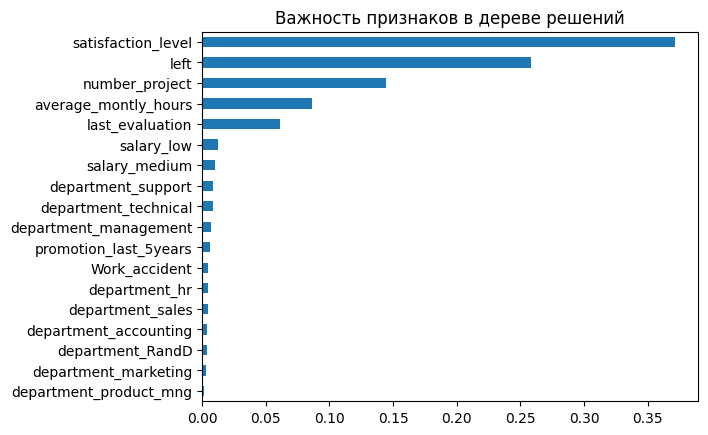

In [ ]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

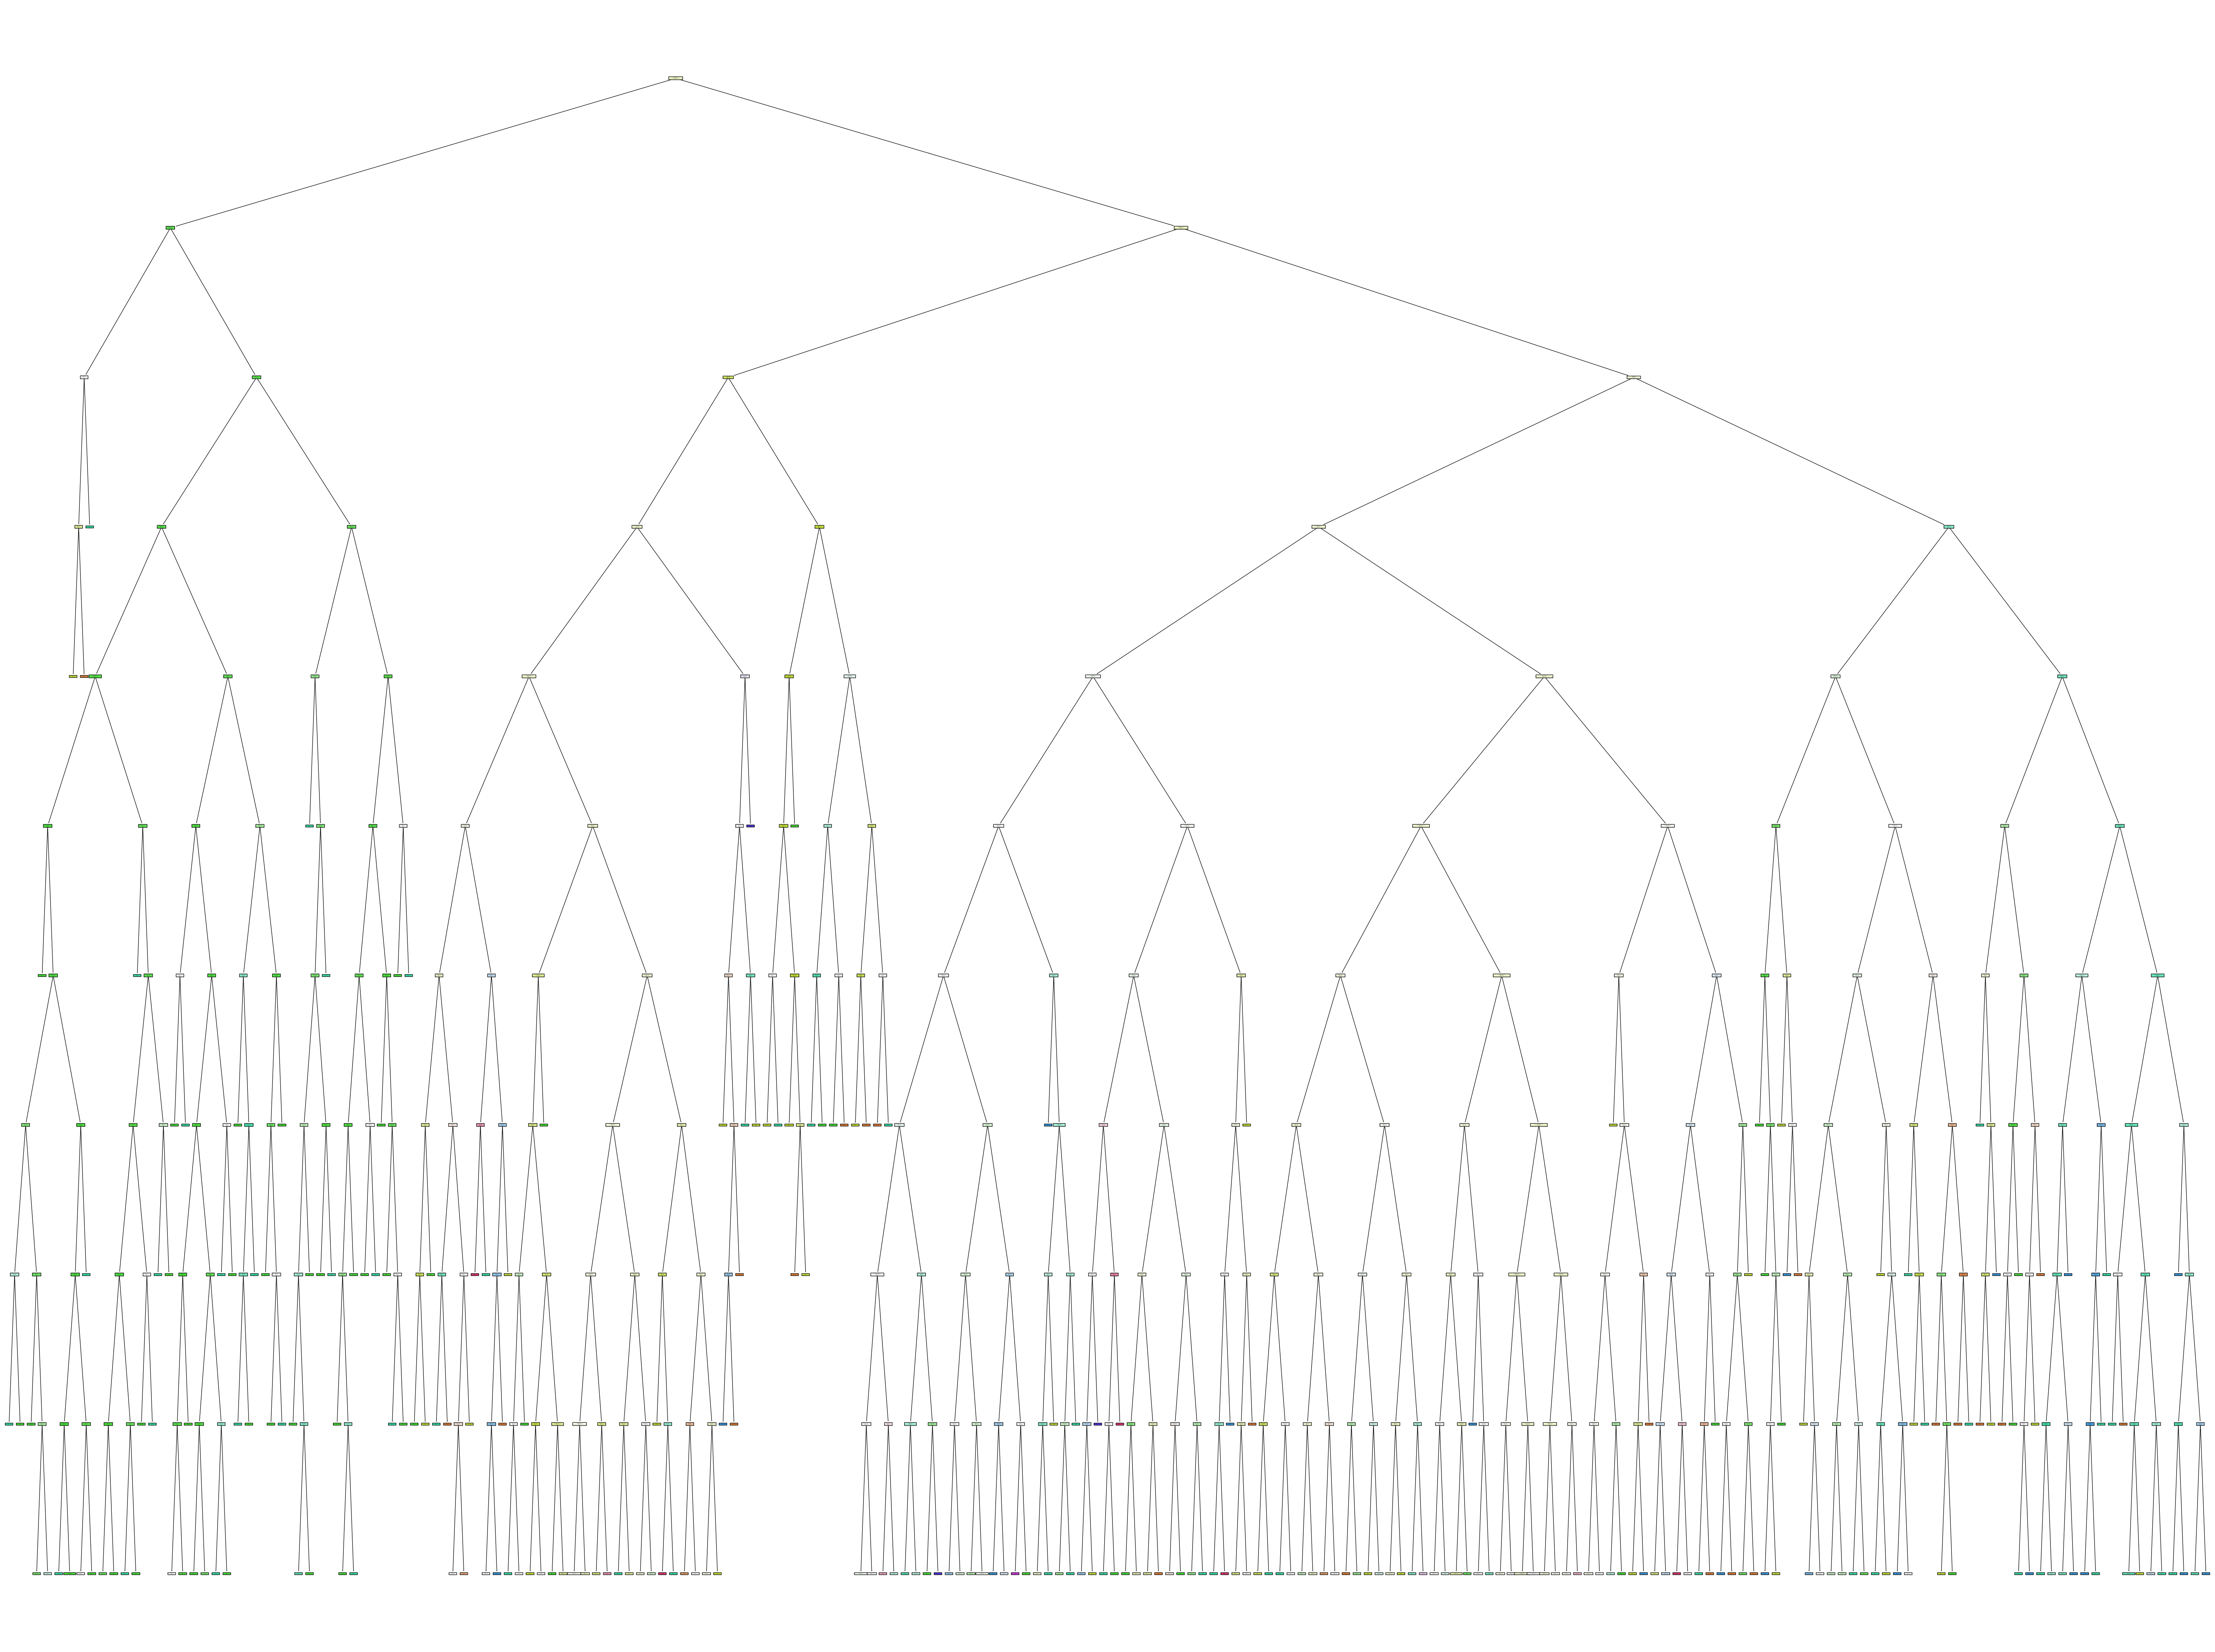

In [ ]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(item) for item in sorted(y.unique())], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss

#Для oversampling
borderline_smote = BorderlineSMOTE(kind='borderline-1')
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

#Для undersampling
near_miss = NearMiss()
X_resampled, y_resampled = borderline_smote.fit_resample(X_resampled, y_resampled)

# Разделяем данные
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#Обучаем модель
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_model.fit(X_train_multi, y_train_multi)

# Предсказания
y_pred_multi = tree_model.predict(X_test_multi)

print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_multi))


Classification Report:
               precision    recall  f1-score   support

           2       0.28      0.66      0.39      1926
           3       0.84      0.27      0.41      1978
           4       0.59      0.24      0.34      1929
           5       0.69      0.54      0.61      1905
           6       0.60      0.49      0.54      1995
           7       0.62      0.78      0.69      1924
           8       0.76      0.74      0.75      1876
          10       0.63      0.70      0.67      1931

    accuracy                           0.55     15464
   macro avg       0.63      0.55      0.55     15464
weighted avg       0.63      0.55      0.55     15464



⏰ Выбрала методы **BorderlineSMOTE для oversampling** и **NearMiss для undersampling**. По отчету о классификации наблюдается дисбаланас, четких границ между меньшими классами нет. С помощью BorderlineSMOTE, который генерирует значения только для примеров меньшего класса, которые находятся близко к границе между классами, мы создаем новые точки и стараемся избавиться от дисбаланса. NearMiss нам нужен для удаления примеров из крупных классов (в нашем случае satisfaction_level и left в особенности), оставляя только наиболее информативные точки.

In [ ]:
accuracy_score(y_test_multi, y_pred_multi)

0.5537377133988619

In [ ]:
balanced_accuracy_score(y_test_multi, y_pred_multi)

0.5559578317425083

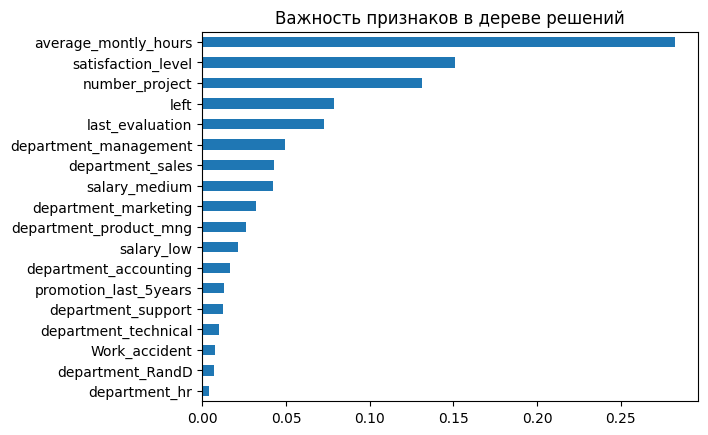

In [ ]:
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

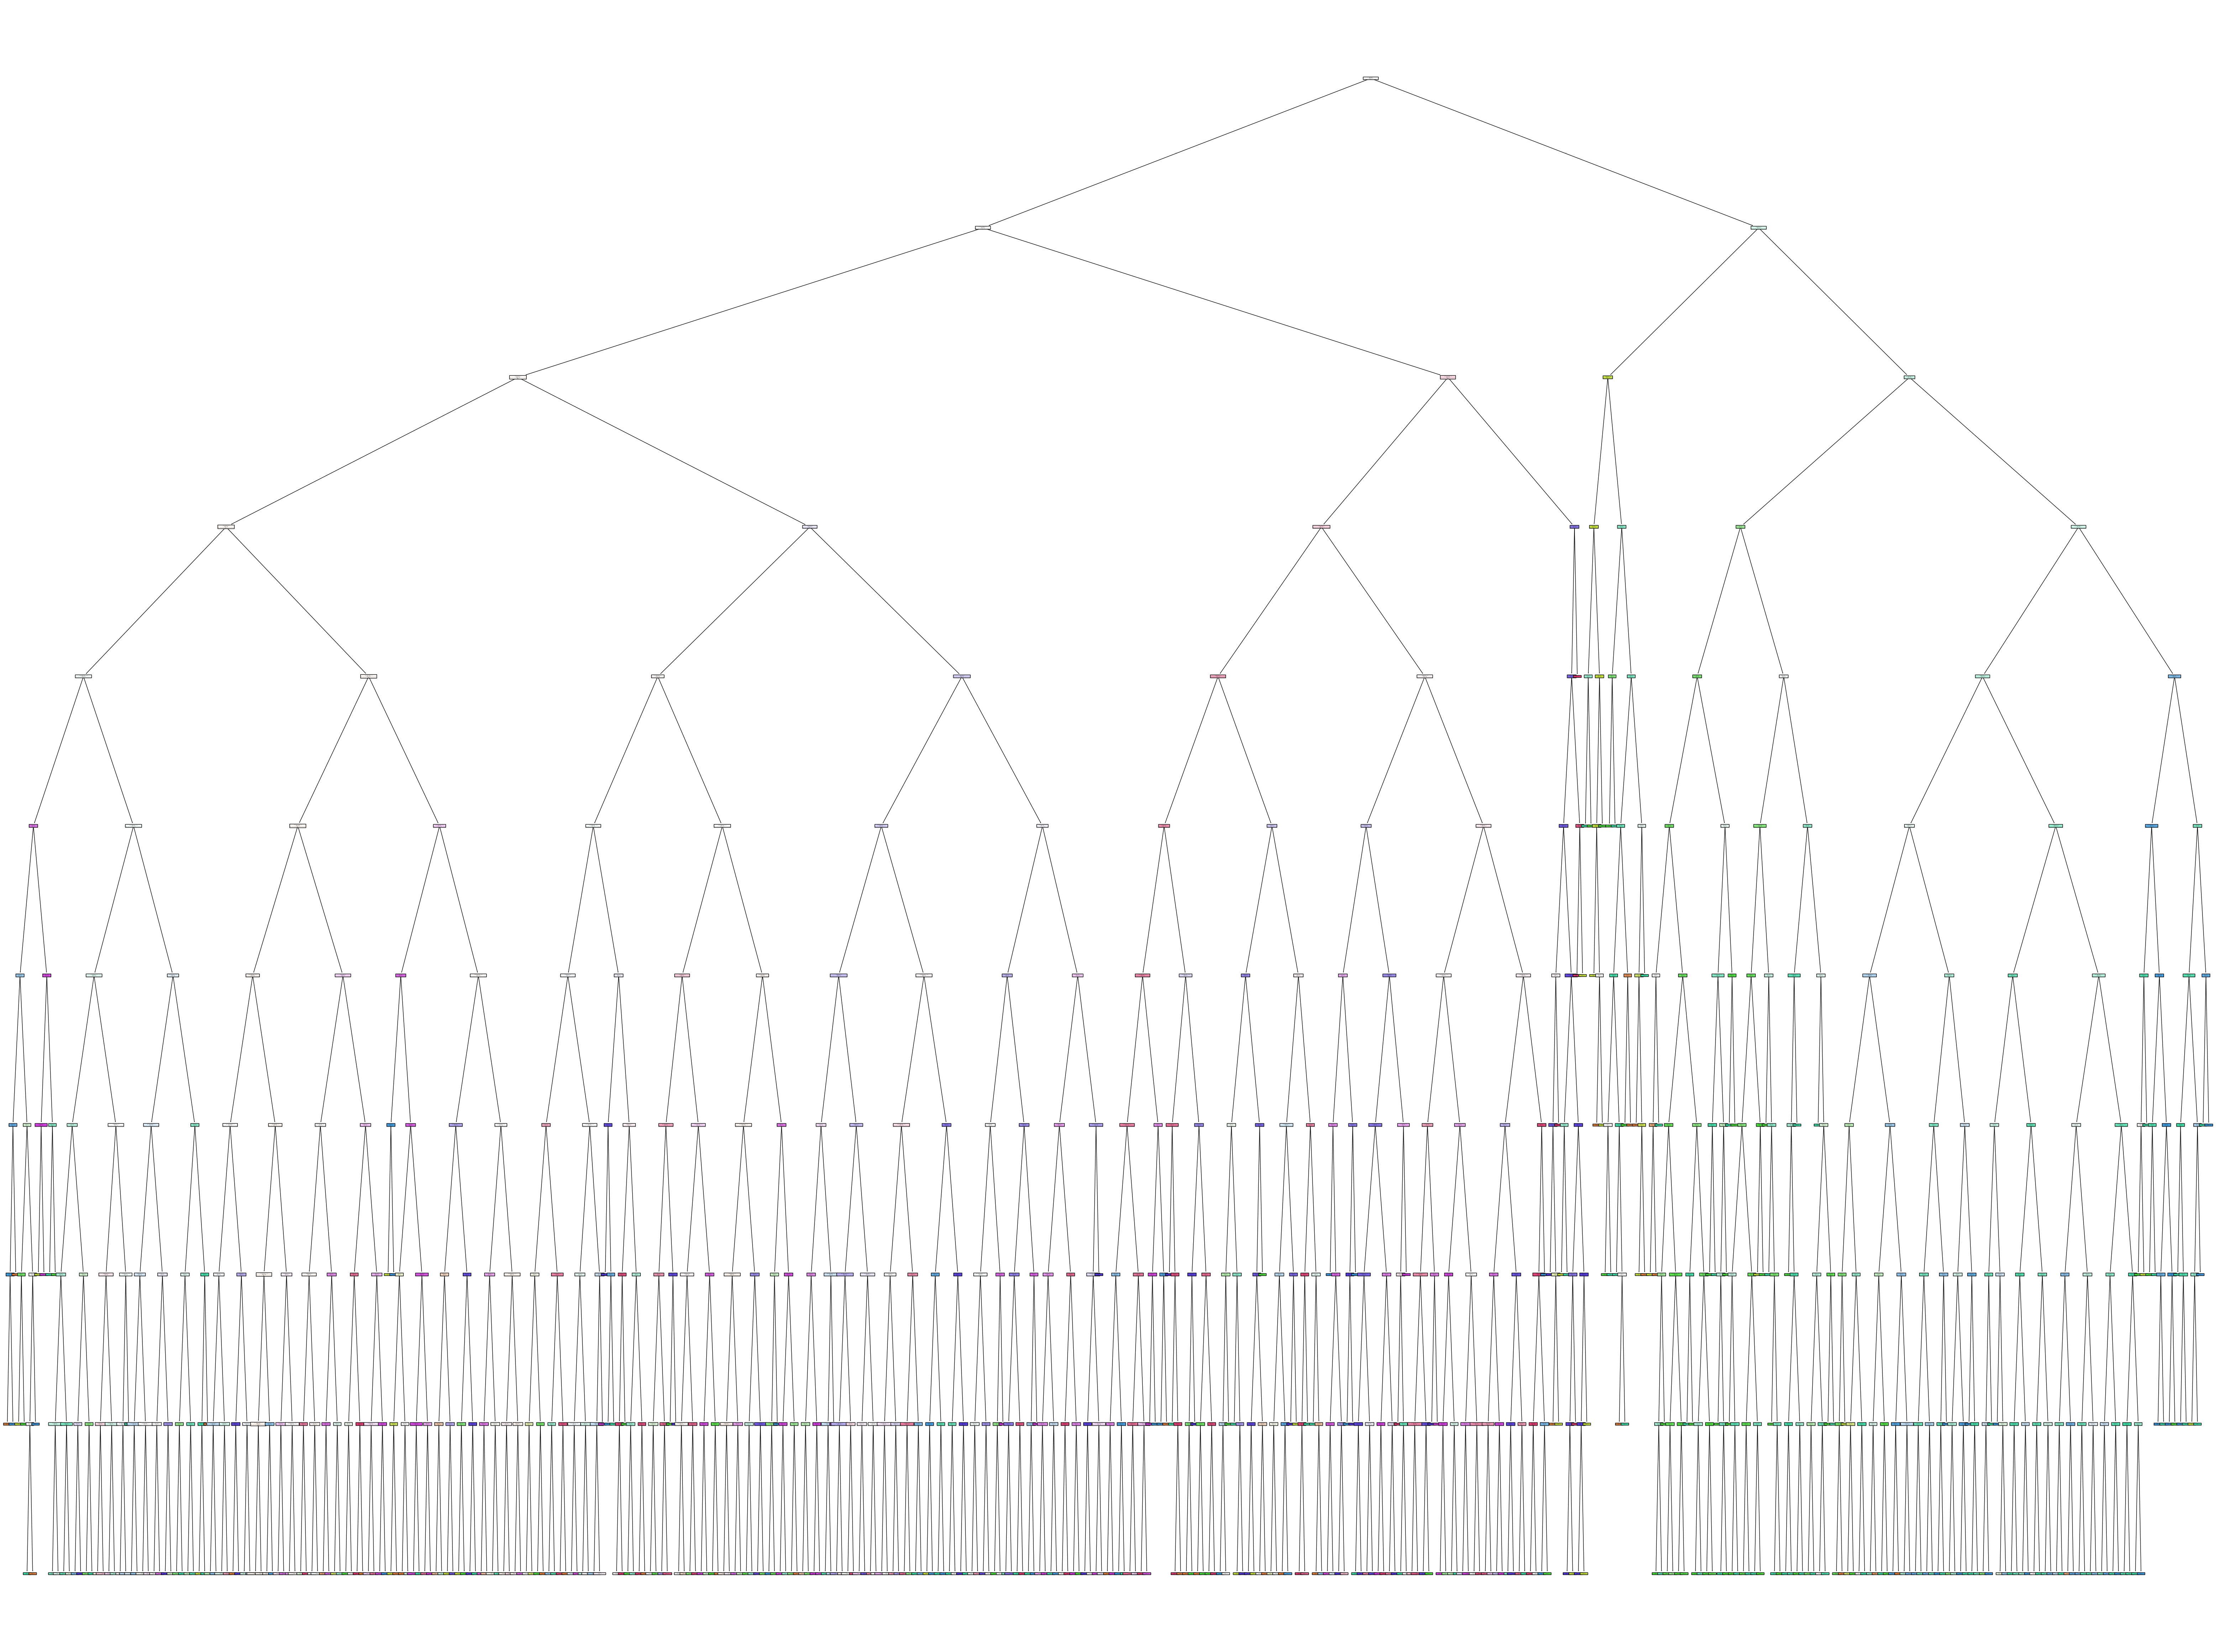

In [ ]:
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(item) for item in sorted(y.unique())], filled=True, rounded=True)
plt.show()